In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
dataset_url = 'https://raw.githubusercontent.com/Draconov/cyber-sec-project1/refs/heads/main/revised_kddcup_dataset.csv'
df = pd.read_csv(dataset_url,index_col=0)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [7]:
tcp_syn_df = df[df.loc[:,"protocol_type"] == "tcp"]
tcp_syn_df = tcp_syn_df[tcp_syn_df.loc[:,"srv_serror_rate"] > 0.7]
tcp_syn_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,X11,S1,286040,383476,0,0,0,0,...,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,normal.
8105,0,tcp,X11,S1,1256,11240,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,xsnoop.
34836,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,saint.
34841,0,tcp,finger,S2,0,334,0,0,0,0,...,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,saint.
34864,0,tcp,private,S0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,saint.


In [8]:
#there are no null values from previous knowledge
service_values = np.unique(tcp_syn_df.loc[:,"service"])
mid = (len(service_values)+1)/2
for i in range(len(service_values)):
    tcp_syn_df = tcp_syn_df.replace(service_values[i], (i-mid)/10)
tcp_syn_df.head()

<ipython-input-8-1636001f0ed9>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tcp_syn_df = tcp_syn_df.replace(service_values[i], (i-mid)/10)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,-2.8,S1,286040,383476,0,0,0,0,...,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,normal.
8105,0,tcp,-2.8,S1,1256,11240,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,xsnoop.
34836,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,saint.
34841,0,tcp,-1.5,S2,0,334,0,0,0,0,...,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,saint.
34864,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,saint.


In [9]:
#I will be extracting all the important features as a "priority" for preprocessing
features = ["service","src_bytes","wrong_fragment","count","num_compromised","srv_count","srv_serror_rate","serror_rate"]
target = "result"
x = tcp_syn_df.loc[:,features]
y =tcp_syn_df.loc[:,target]
classes = np.unique(y)
print(classes)

['apache2.' 'guess_passwd.' 'land.' 'mscan.' 'neptune.' 'nmap.' 'normal.'
 'processtable.' 'saint.' 'satan.' 'warezmaster.' 'xsnoop.']


In [10]:
#replacing all classes of attack with 1 and normal result with 0 in our icmp_df
for i in range(len(classes)):
    if i == 2:
        tcp_syn_df = tcp_syn_df.replace(classes[i], 0)
    else:
        tcp_syn_df = tcp_syn_df.replace(classes[i], 1)

#turning the service attribute to categorical values
tcp_syn_df=tcp_syn_df.replace("eco_i",-0.1)
tcp_syn_df=tcp_syn_df.replace("ecr_i",0.0)
tcp_syn_df=tcp_syn_df.replace("tim_i",0.1)
tcp_syn_df=tcp_syn_df.replace("urp_i",0.2)
tcp_syn_df.head()

<ipython-input-10-8cded66910df>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tcp_syn_df = tcp_syn_df.replace(classes[i], 1)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
170,0,tcp,-2.8,S1,286040,383476,0,0,0,0,...,1,0.02,0.11,0.02,0.0,0.02,1.00,0.09,0.0,1
8105,0,tcp,-2.8,S1,1256,11240,0,0,0,0,...,1,0.00,0.02,0.00,0.0,0.00,1.00,0.00,0.0,1
34836,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,0.13,0.00,0.0,0.05,1.00,0.07,0.0,1
34841,0,tcp,-1.5,S2,0,334,0,0,0,0,...,3,0.01,0.32,0.00,0.0,0.06,0.33,0.25,0.0,1
34864,0,tcp,1.1,S0,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.04,1.00,0.96,0.0,1


[]

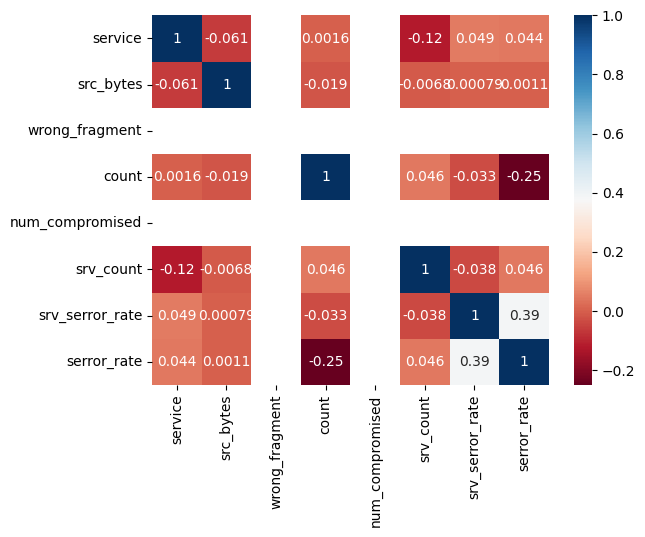

In [11]:
y=tcp_syn_df.loc[:,target]
#We will have to find some covariance between them so I will plot a covariance heatmap
sns.heatmap(x.corr(), annot=True,cmap="RdBu")
plt.plot()
#the data as seen is highly uncorrelated as most of it is one valued such as the duration one.

In [13]:
from sklearn.ensemble import RandomForestClassifier
rs = RandomForestClassifier()
rs.fit(x,y)
print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))

service            0.551393
count              0.322230
srv_count          0.101792
src_bytes          0.021877
serror_rate        0.002697
srv_serror_rate    0.000012
wrong_fragment     0.000000
num_compromised    0.000000
dtype: float64


In [15]:
#We updated feature selection to release overfitting and accuracy improvement in generalised prediction
x = x.loc[:,["service","count","srv_count","src_bytes","serror_rate"]]
for i in x.index:
    if y[i] == 0:
        print(i,":",x.loc[i,:])

136558 : service       -1.5
count          1.0
srv_count      1.0
src_bytes      0.0
serror_rate    1.0
Name: 136558, dtype: float64
136559 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136559, dtype: float64
136560 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136560, dtype: float64
136561 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136561, dtype: float64
136562 : service       -1.5
count          1.0
srv_count      3.0
src_bytes      0.0
serror_rate    1.0
Name: 136562, dtype: float64
136563 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136563, dtype: float64
136564 : service       -1.5
count          1.0
srv_count      2.0
src_bytes      0.0
serror_rate    1.0
Name: 136564, dtype: float64
136565 : service       -1.5
count          1.0
srv_count      2.0
src

In [17]:
print(list(x.loc[136565 ,:])) #there will be 5 attributes now
print(y[136565 ])

[-1.5, 1.0, 2.0, 0.0, 1.0]
0


In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","DecisionTree"]
scores = []

for model in models:
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

Accuracy of the model is:  99.94514536478333
Confusion Matrix:
 [[   0    3]
 [   0 5466]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00      5466

    accuracy                           1.00      5469
   macro avg       0.50      0.50      0.50      5469
weighted avg       1.00      1.00      1.00      5469


==============***===============


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of the model is:  99.98171512159443
Confusion Matrix:
 [[   2    1]
 [   0 5466]]
Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      1.00      1.00      5466

    accuracy                           1.00      5469
   macro avg       1.00      0.83      0.90      5469
weighted avg       1.00      1.00      1.00      5469


==============***===============
Accuracy of the model is:  99.94514536478333
Confusion Matrix:
 [[   0    3]
 [   0 5466]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       1.00      1.00      1.00      5466

    accuracy                           1.00      5469
   macro avg       0.50      0.50      0.50      5469
weighted avg       1.00      1.00      1.00      5469


==============***===============
Accuracy of the model is:  99.98171512159443
Confusion Matrix:
 [[   2    1]
 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


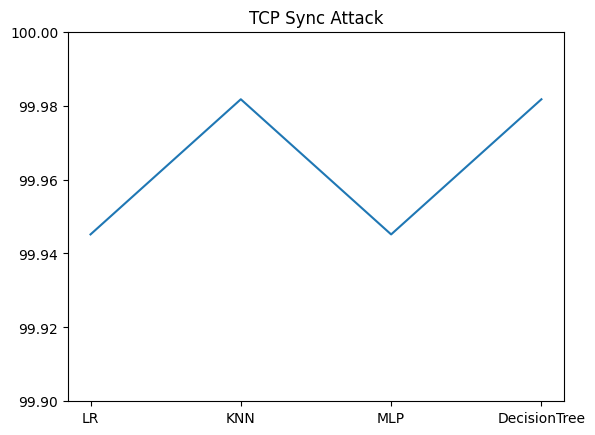

In [19]:
plt.plot(classifiers,scores)
plt.title("TCP Sync Attack")
plt.ylim(99.9,100)
plt.show()